In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['font.weight']='normal'

mpl.rcParams['font.size']=17 #10 #16 pour posts
mpl.rcParams['legend.fontsize']=14 #10 12 pour posts
#inline backend pour voir les figures dans le frontend notebook https://ipython.readthedocs.io/en/stable/interactive/plotting.html

In [55]:
fname='results200/'


graphs_ll=pd.DataFrame(data=np.loadtxt(fname+"graphs_ll.gnu"),columns=['t1','lltrue','llhGP','llGP'])
hp=pd.DataFrame(data=np.loadtxt(fname+"graphs_hpars.gnu"),columns=['t1','edmtrue','exptrue','ltrue','edmap','expap','lap'])

hp=hp.sort_values(by='t1')
graphs_ll=graphs_ll.sort_values(by='t1')

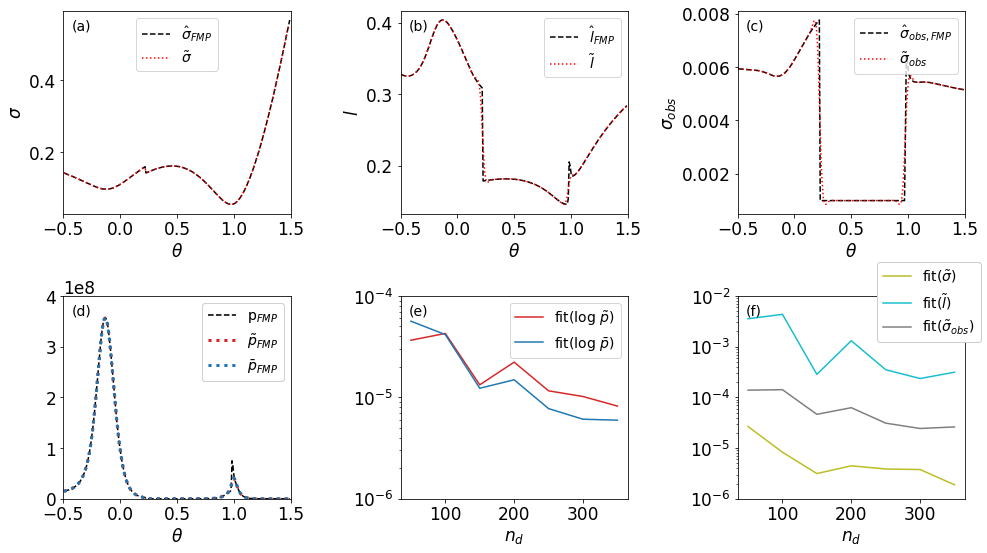

In [56]:
#tri des dataframes en fonction des valeurs de theta.
def setlabel(ax, label, loc=2, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(np.NaN,np.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],loc=loc,handlelength=0,handleheight=0,handletextpad=0,borderaxespad=0,borderpad=borderpad,frameon=False,**kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
    

#affichage de la décroissance des erreurs au fur et à mesure de l'augmentation du nombre de points.
nobs=np.array([50,100,150,200,250,300,350])
#erreurs a posteriori sur les hpars
  
erredm=np.array([2.66416e-05,8.29293e-06,3.14562e-06,4.47161e-06,3.87219e-06,3.77542e-06,1.88781e-06])
errl=np.array([0.00355033,0.00433629,0.000284481,0.00130999,0.000350776,0.000235457,0.000313116])
errexp=np.array([0.000138882,0.000141755,4.62968e-05,6.26003e-05,3.10226e-05,2.43476e-05,2.61415e-05])

#erreur sur les likelihoods
errhgps=np.array([3.66e-5,4.2709e-5,1.33e-5,2.225e-5,1.16e-5,1.02e-5,8.21e-6])
errhll=np.array([5.64e-5,4.16e-5,1.23e-5,1.49e-5,7.75e-6,6.09e-6,5.96e-6])

#affichage des hyperparamètres optimaux

skoh=0.0612
sobskoh=1e-3
lkoh=0.147
xlim=[-0.5,1.5]

fig,axs=plt.subplots(figsize=[14,8],ncols=3,nrows=2)

axs[1,0].plot(graphs_ll['t1'],np.exp(graphs_ll['lltrue']),color='black',linestyle='--',label=r'p$_{FMP}$')
axs[1,0].plot(graphs_ll['t1'],np.exp(graphs_ll['llhGP']),color='tab:red',linestyle='dotted',linewidth=3,label=r'$\tilde{p}_{FMP}$')
axs[1,0].plot(graphs_ll['t1'],np.exp(graphs_ll['llGP']),color='tab:blue',linestyle='dotted',linewidth=3,label=r'$\bar{p}_{FMP}$')
axs[1,0].set_xlim(xlim)
axs[1,0].set_ylim([0,4e8])
axs[1,0].legend()


axs[0,0].plot(hp['t1'],hp['edmtrue'],color='black',linestyle='--',label=r'$\hat{\sigma}_{FMP}$')
axs[0,1].plot(hp['t1'],hp['ltrue'],color='black',linestyle='--',label=r'$\hat{l}_{FMP}$')
axs[0,2].plot(hp['t1'],hp['exptrue'],color='black',linestyle='--',label=r'$\hat{\sigma}_{obs,FMP}$')

axs[0,0].plot(hp['t1'],hp['edmap'],color='red',linestyle='dotted',label=r'$\tilde{\sigma}$')
axs[0,1].plot(hp['t1'],hp['lap'],color='red',linestyle='dotted',label=r'$\tilde{l}$')
axs[0,2].plot(hp['t1'],hp['expap'],color='red',linestyle='dotted',label=r'$\tilde{\sigma}_{obs}$')



axs[0,0].set_xlim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,2].set_xlim(xlim)
axs[1,0].set_xlim(xlim)

axs[0,0].set_xlabel(r'$\theta$')
axs[0,1].set_xlabel(r'$\theta$')
axs[0,2].set_xlabel(r'$\theta$')
axs[1,0].set_xlabel(r'$\theta$')

axs[0,0].set_ylabel(r'$\sigma$')
axs[0,1].set_ylabel(r'$l$')
axs[0,2].set_ylabel(r'$\sigma_{obs}$')





#plot des erreurs
axs[1,1].plot(nobs,errhgps,color='tab:red',label=r'fit(log $\tilde{p}$)')
axs[1,1].plot(nobs,errhll,color='tab:blue',label=r'fit(log $\bar{p}$)')
axs[1,1].set_yscale('log')
axs[1,1].set_ylim([1e-6,1e-4])

axs[1,2].plot(nobs,erredm,color='tab:olive',label=r'fit($\tilde{\sigma}$)')
axs[1,2].plot(nobs,errl,color='tab:cyan',label=r'fit($\tilde{l}$)')
axs[1,2].plot(nobs,errexp,color='tab:grey',label=r'fit($\tilde{\sigma}_{obs}$)')
axs[1,2].set_yscale('log')
axs[1,2].set_ylim([1e-6,1e-2])


axs[1,1].set_xlabel(r'$n_d$')
axs[1,2].set_xlabel(r'$n_d$')


setlabel(axs[0,0], '(a)')
setlabel(axs[0,1], '(b)')
setlabel(axs[0,2], '(c)')
setlabel(axs[1,0], '(d)')
setlabel(axs[1,1], '(e)')
setlabel(axs[1,2], '(f)')

axs[0,0].legend(loc='upper center')
axs[0,1].legend()
axs[1,0].legend()
axs[0,2].legend()
axs[1,1].legend()

plt.tight_layout()
axs[1,2].legend(loc='upper right',bbox_to_anchor=(1.1, 1.2),framealpha=1)




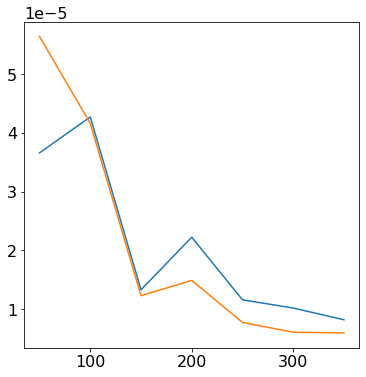

In [11]:
#affichage de la décroissance des erreurs au fur et à mesure de l'augmentation du nombre de points.
nobs=np.array([50,100,150,200,250,300,350])
#erreurs a posteriori
errhgps=np.array([3.66e-5,4.2709e-5,1.33e-5,2.225e-5,1.16e-5,1.02e-5,8.21e-6])
errhll=np.array([5.64e-5,4.16e-5,1.23e-5,1.49e-5,7.75e-6,6.09e-6,5.96e-6])

plt.figure(figsize=[6,6])
plt.plot(nobs,errhgps)
plt.plot(nobs,errhll)


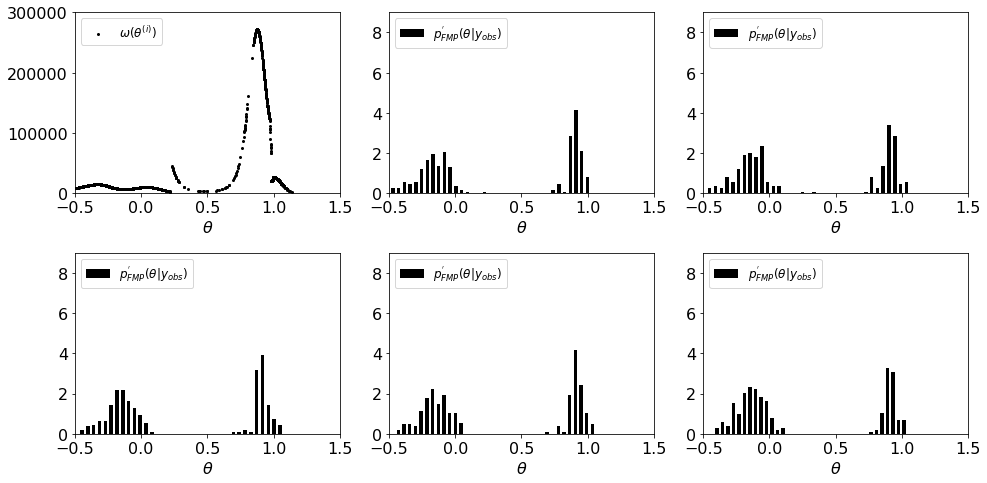

In [8]:
nbins=35
fig,axs=plt.subplots(figsize=[14,7],ncols=3,nrows=2)
ylim=[0,9]
axs[0,0].scatter(weights['t1'],weights['w'],color='black',s=4,label=r'$\omega(\theta^{(i)})$')
axs[0,1].hist(res1['t1'],bins=nbins,density=True,rwidth=0.6,color='black',label=r"$p^{'}_{FMP}(\theta|y_{obs})$")
axs[0,2].hist(res2['t1'],bins=nbins,density=True,rwidth=0.6,color='black',label=r"$p^{'}_{FMP}(\theta|y_{obs})$")
axs[1,0].hist(res3['t1'],bins=nbins,density=True,rwidth=0.6,color='black',label=r"$p^{'}_{FMP}(\theta|y_{obs})$")
axs[1,1].hist(res4['t1'],bins=nbins,density=True,rwidth=0.6,color='black',label=r"$p^{'}_{FMP}(\theta|y_{obs})$")
axs[1,2].hist(res5['t1'],bins=nbins,density=True,rwidth=0.6,color='black',label=r"$p^{'}_{FMP}(\theta|y_{obs})$")

axs[0,0].set_ylim([0,30e4])
axs[0,0].legend(loc='upper left')
axs[0,1].legend(loc='upper left')
axs[0,2].legend(loc='upper left')
axs[1,0].legend(loc='upper left')
axs[1,1].legend(loc='upper left')
axs[1,2].legend(loc='upper left')

axs[0,1].set_ylim(ylim)
axs[0,2].set_ylim(ylim)
axs[1,0].set_ylim(ylim)
axs[1,1].set_ylim(ylim)
axs[1,2].set_ylim(ylim)

axs[0,0].set_xlim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,2].set_xlim(xlim)
axs[1,0].set_xlim(xlim)
axs[1,1].set_xlim(xlim)
axs[1,2].set_xlim(xlim)

axs[0,0].set_xlabel(r'$\theta$')
axs[0,1].set_xlabel(r'$\theta$')
axs[0,2].set_xlabel(r'$\theta$')
axs[1,0].set_xlabel(r'$\theta$')
axs[1,1].set_xlabel(r'$\theta$')
axs[1,2].set_xlabel(r'$\theta$')

plt.tight_layout()

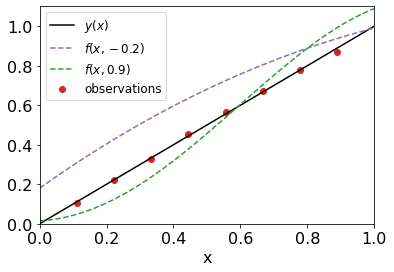

In [146]:
#plot pour donner une idée du modèle
def f(x,theta):
    return x*np.sin(2*x*theta)+(x+0.15)*(1-theta)

obs=pd.DataFrame(data=np.loadtxt(fname+"obs.gnu"),columns=['x','y'])
X=np.linspace(0,1,100)
fig,ax=plt.subplots(figsize=[6,4],ncols=1,nrows=1)
ax.scatter(obs['x'],obs['y'],color='tab:red',label='observations')
ax.plot(X,X,color='black',label=r'$y(x)$')
ax.plot(X,f(X,-0.2),color='tab:purple',label=r'$f(x,-0.2)$',linestyle='--')
ax.plot(X,f(X,0.9),color='tab:green',label=r'$f(x,0.9)$',linestyle='--')
ax.set_xlim([0,1])
ax.set_ylim([0,1.1])
ax.set_xlabel('x')

ax.legend()



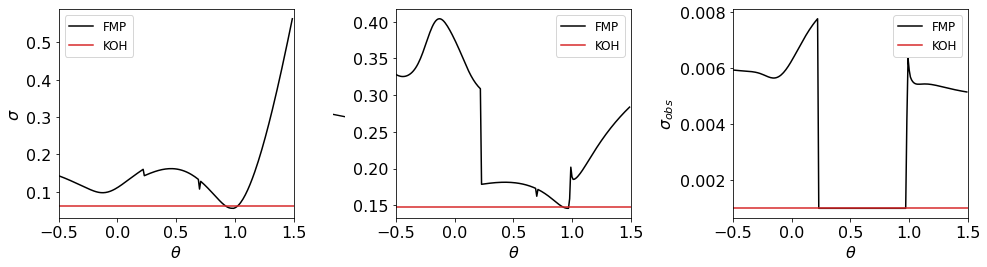

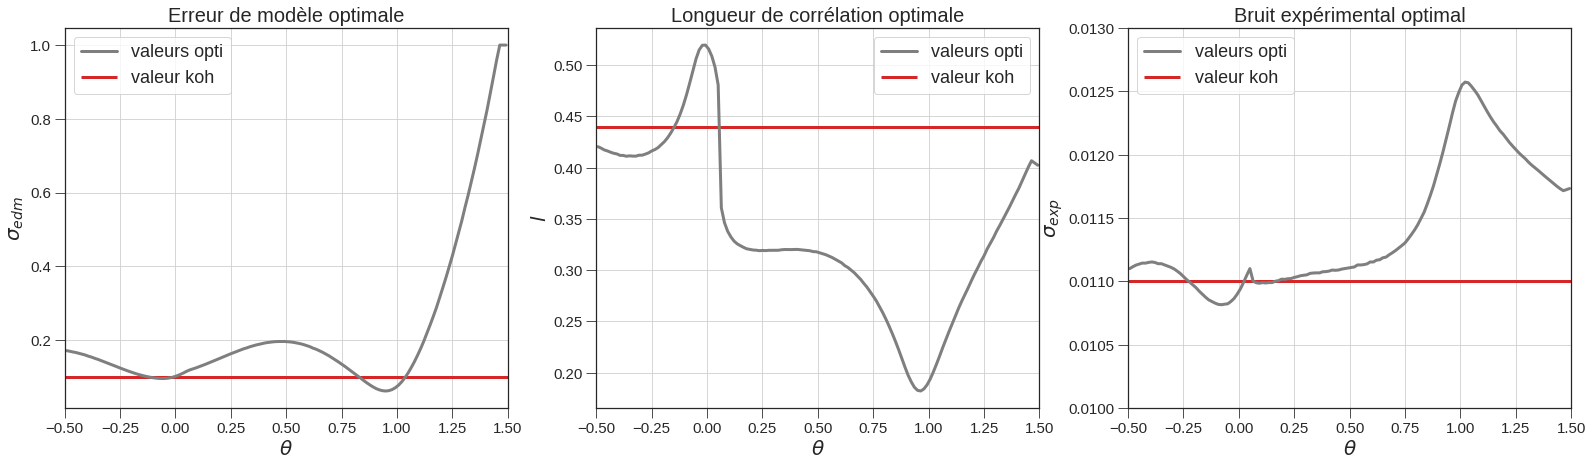

(0.0, 1.2)

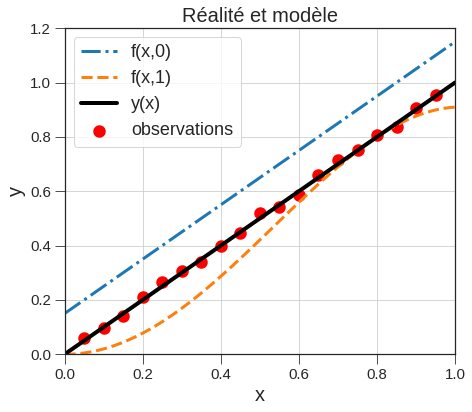

[   0    1    2 ... 9997 9998 9999]


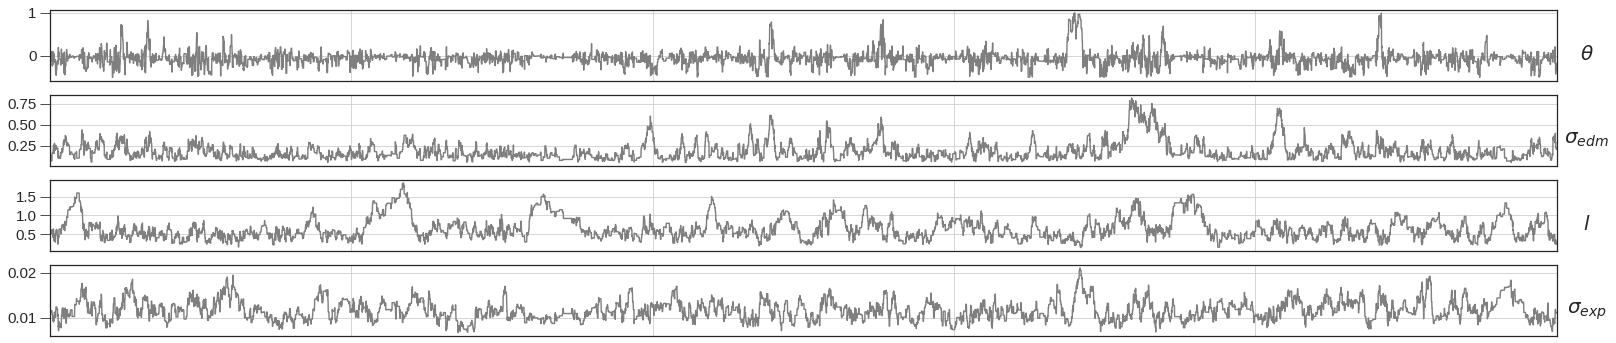

NameError: name 'summary' is not defined

Text(0, 0.5, '$\\mathrm{p}(l)$')

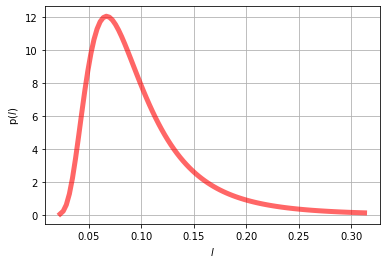

In [49]:
#affichage d'une loi inverse-gamma pour illustrer
from scipy.stats import invgamma
a=5
b=0.4 #ou 1/0.4 ?
fig, ax = plt.subplots(1, 1)
x = np.linspace(invgamma.ppf(0.0001, a,scale=b),invgamma.ppf(0.99, a,scale=b), 100)
ax.plot(x, invgamma.pdf(x, a,scale=b),'r-', lw=5, alpha=0.6, label='invgamma pdf')
plt.grid()
ax.set_xlabel(r'$l$')
ax.set_ylabel(r'$\mathrm{p}(l)$')
